# Projet Simulation: SEIR

![SEIR Model](SEIR.webp)

---

**Authors:**
- Orhan Cartelli Elijah
- Engelbrecht Jerôme

# Introduction to SEIR Simulation Model

The SEIR model is a widely-used epidemiological model designed to simulate the spread of infectious diseases within a population. It is based on compartmentalization, dividing the population into four distinct compartments:

- **Susceptible (S)**: Individuals who are susceptible to the disease and can become infected if they come into contact with infectious individuals.

- **Exposed (E)**: Individuals who have been exposed to the disease but are not yet infectious. This represents the latent period during which the individual is infected but not yet showing symptoms or infectious.

- **Infectious (I)**: Individuals who are infected and can spread the disease to susceptible individuals.

- **Recovered (R)**: Individuals who have recovered from the disease and are assumed to have acquired immunity, at least temporarily. They are not susceptible to reinfection.

The SEIR model tracks the flow of individuals between these compartments over time through a system of ordinary differential equations (ODEs). It considers parameters such as the transmission rate, the incubation period, and the recovery rate to model the dynamics of disease spread.

SEIR models are widely used in epidemiology and public health research to study the dynamics of infectious diseases such as influenza, measles, and COVID-19. By adjusting parameters and initial conditions, SEIR simulations can provide insights into the potential trajectory of an epidemic and inform public health interventions.


# Table of Contents

1. [Organization of Files and Packages](#organization)
2. [Functionality of Various Files and Main Functions](#functionality)
3. [Stats and Tests](#stats)
4. [Results obtained](#results)
5. [Conclusion](#conclusion)


## Organization of Files and Packages <a id="organization"></a>

Our project directory is structured as follows:

````{verbatim}
.
├── build/
│   └── com/
│       ├── main/
│       │   ├── CSVGenerator.class
│       │   ├── Grid.class
│       │   ├── Keyboard.class
│       │   ├── Main.class
│       │   ├── MersenneTwister.class
│       │   ├── Subject.class
│       │   ├── Utils.class
│       │   └── Vector2.class
│       └── visual/
│           ├── Interface.class
│           └── ProgressBarWindow.class
├── data/
├── jupyter notebook/
├── py/
│   └── Graphics.py
├── README.md
└── src/
    └── com/
        ├── main/
        │   ├── CSVGenerator.java
        │   ├── Grid.java
        │   ├── Keyboard.java
        │   ├── Main.java
        │   ├── MersenneTwister.java
        │   ├── Subject.java
        │   ├── Utils.java
        │   └── Vector2.java
        └── visual/
            └── Interface.java
````

In this structure:

- The `build/` directory contains compiled Java `.class` files organized under `com.main` and `com.visual` packages.
- The `src/` directory contains the source Java files organized similarly under `com.main` and `com.visual`.
- Other directories such as `data/`, `jupyter notebook/`, and `py/` appear to contain various data, Jupyter Notebook files, and Python scripts, respectively.
- There is a `README.md` file providing information about the project.

This organization separates source files (`src/`) from compiled files (`build/`), and classes are structured within appropriate packages to maintain modularity and facilitate ease of development and maintenance.

## Functionality of Various Files and Main Functions <a id="functionality"></a>

### Functionality in `./src/com/main` Folder

The `./src/com/main` folder, also referred to as `package com.main`, contains the following files, which represent the core functionalities used in the project:

1. **Main**:
   - Description: This file serves to initialize and configure the project; everything is managed inside it.

2. **Grid**:
   - Description: Defines a grid used for the SEIR simulation.

3. **MersenneTwister**:
   - Description: Enables the generation of high-quality pseudo-random numbers.

4. **Subject**:
   - Description: Defines the subjects of experiments and their status (Susceptible (S), Exposed (E), Infectious (I), Recovered (R)), as well as managing them.

5. **Utils** and **Vector2**:
   - Description: Additional functionalities sometimes redefined, sometimes added, allowing for better manipulation of the environment.

### Functionality in `./src/com/visual` Folder

The `./src/com/visual` folder, also referred to as `package com.visual`, contains the following file, which provides graphical interface functionality:

- **Interface**:
  - Description: This file allows the generation of a graphical interface enabling a clearer visualization of the simulation, making its understanding simpler.


### Functionality in `./src/com/main/Main.java`

The `Main.java` file located at `./src/com/main` contains the main functions of the project, utilizing predefined simulation parameters:

#### Java Code of the parameters:
````{verbatim}
    public static Main instance;
    private static double clockRunSpeed = (1f/60f)*1000f;

    public static boolean USE_GUI = false; // Default : false;
    public static boolean WAIT_FOR_USER_INPUT = false; // Default : false
    public static boolean ENABLE_TELEPORT_MOVEMENT = true; // Default : true
    public static boolean ENABLE_SUBJECT_DEATH = false; // Default : false

    public static int SIMULATION_ITERATIONS = 730; // Default : 730
    public static int SIMULATION_COUNT = 100; // Default : 100

    public static int GRID_SIZE_X = 300; // Default : 300
    public static int GRID_SIZE_Y = 300; // Default : 300

    public static int INITIAL_POP_COUNT = 20000; // Default : 20000
    public static int INITIAL_INFECTED_COUNT = 20; //Default : 20

    public Utils.DebugType debugType = Utils.DebugType.none;
    public double countedFps;
    public int countedFpsIterations;
    public long startTime;
    public boolean isPaused;

    public int currentSimulationStep = 0;


    private boolean isRunning = false;
    
    public MersenneTwister rand;
    public Scanner scanner = new Scanner(System.in);
    public Interface gui;
    public Grid grid;
````

#### What it actually do:

- **Enabling the GUI**:
  - Description: The file allows enabling a graphical user interface (GUI) for visualization.

- **Setting Frames Per Second (FPS)**:
  - Description: Defines the number of frames per second for the GUI, controlling the speed of simulation visualization.

- **Defining Allowed Movements for Subjects**:
  - Description: Specifies the allowed movements for subjects within the simulation environment.

- **Specifying Number of Subjects**:
  - Description: Determines the total number of subjects present in the simulation.

- **Determining Number of Infected Subjects**:
  - Description: Specifies the initial number of infected subjects among the total subjects.

- **Setting Grid Size**:
  - Description: Defines the size of the grid used for the simulation.

- **Specifying Number of Simulations**:
  - Description: Determines the total number of simulations to be conducted.

- **Setting Iterations Per Simulation**:
  - Description: Specifies the number of iterations to be performed for each simulation.

These parameters help configure and control the simulation process within the `Main.java` file.

### Functions in `Main.java`

#### 1. `private void Awake()`

- **Input Parameters:** None
- **Output Parameters:** None
- **Description:** This function is called during program initialization to perform setup tasks. It prints a debug message indicating that the program is awake.

#### 2. `private void Start()`

- **Input Parameters:** None
- **Output Parameters:** None
- **Description:** This function is called after the program has awakened to perform initialization tasks. It prints a debug message indicating that the program has started. It also initializes the grid, fills it with initial population and infected individuals, and optionally displays the grid interface if `USE_GUI` is set to `true`.

#### 3. `private void Update()`

- **Input Parameters:** None
- **Output Parameters:** None
- **Description:** This function is responsible for updating the simulation state in each iteration. It advances the simulation by one step, updates the grid display if GUI is enabled, records the current step's data, and checks for the end of the simulation. It also prints debug information such as population info and timing details.

#### 4. `private void End()`

- **Input Parameters:** None
- **Output Parameters:** None
- **Description:** This function is called when the program is about to terminate. It calculates and prints the average frames per second (FPS) achieved during runtime and prints a debug message indicating that the program has ended.

### Functionality in `./src/com/visual/Interface.java`

The `Interface.java` file located at `./src/com/visual` implements the graphical user interface (GUI) for the project, facilitating a better visualization of the simulation and clearer understanding of the project's objective.

### Functions in `Interface.java`

1. `public Interface(int width, int height, int numRows, int numCols)`

   - **Input Parameters**: 
     - `width`: Width of the interface.
     - `height`: Height of the interface.
     - `numRows`: Number of rows in the grid.
     - `numCols`: Number of columns in the grid.
   - **Output Parameters**: None
   - **Description**: Constructor function for the Interface class. Initializes the interface with the specified dimensions and creates and shows the GUI.

2. `private void createAndShowGUI()`

   - **Input Parameters**: None
   - **Output Parameters**: None
   - **Description**: Creates and displays the graphical user interface (GUI) including the main frame, display panel, grid panel, and progress bar.

3. `private void createGridPanel(int numRows, int numCols)`

   - **Input Parameters**: 
     - `numRows`: Number of rows in the grid.
     - `numCols`: Number of columns in the grid.
   - **Output Parameters**: None
   - **Description**: Creates the grid panel within the display panel. It calculates the size and position of the grid panel based on the number of rows and columns, and adds cells to the grid panel.

4. `private JPanel createPanel(Color color, int width)`

   - **Input Parameters**: 
     - `color`: Background color of the panel.
     - `width`: Width of the panel.
   - **Output Parameters**: `JPanel`
   - **Description**: Creates a panel with the specified background color and width.

5. `private JPanel createPanel(Color backgroundColor)`

   - **Input Parameters**: 
     - `backgroundColor`: Background color of the panel.
   - **Output Parameters**: `JPanel`
   - **Description**: Creates a panel with the specified background color.

6. `private JPanel createButtonPanel(String buttonText1, String buttonText2)`

   - **Input Parameters**: 
     - `buttonText1`: Text for the first button.
     - `buttonText2`: Text for the second button.
   - **Output Parameters**: `JPanel`
   - **Description**: Creates a panel containing buttons with the specified text.

7. `private JButton createButton(String text)`

   - **Input Parameters**: 
     - `text`: Text for the button.
   - **Output Parameters**: `JButton`
   - **Description**: Creates a button with the specified text.

8. `public void displayGrid(Grid grid)`

   - **Input Parameters**: 
     - `grid`: Instance of the `Grid` class representing the simulation grid.
   - **Output Parameters**: None
   - **Description**: Updates the display of the grid based on the current state of the simulation grid. It sets the background color of each cell in the grid panel based on the cell's content and updates the progress bar based on the simulation progress.


## Stats and Tests<a id="stats"></a>

In [ ]:
from Graphics import gen_graph
data_set = int(input("Data set ? (between 0 and 99): "))
while (data_set<0 or data_set>99):
    data_set = int(input("Data set ? (between 0 and 99): "))
gen_graph(data_set)
    
##################################################################
# press Shift + Enter, or Run the cell with the top bar button   #
# You can try 1, 7, 38, 42, 64, 65, 98, 99 data sets as examples #
##################################################################

![SEIR Model](average_seir_model.png)

## Results Obtained <a id="results"></a>

### Pie Chart:

![SEIR Model](pie_chart.png)

**Data set used: 0**

**Results:** The pie chart will display the proportion of each category (e.g., different stages of an epidemic model) in the dataset. Each slice of the pie represents the proportion of the total sum of values for that category.

**Insights:** This visualization can help in understanding the relative distribution of each category over time. It allows us to quickly identify which category dominates the dataset and how it compares to others. For instance, if one category occupies a significantly larger portion of the pie compared to others, it suggests that this category is more prevalent or has a greater impact.

### Histogram:

![SEIR Model](histogram.png)

**Data set used: 30**

**Results:** The histogram will display the frequency distribution of values within each variable (e.g., susceptible, exposed, infected, recovered).

**Insights:** By examining the shape of each histogram, we can gain insights into the distribution of values within each variable. For example:
- If the histogram is symmetrically distributed around the mean, it suggests a normal distribution.
- If the histogram is skewed to the left or right, it indicates a skewed distribution.
- If the histogram has multiple peaks, it may suggest the presence of multiple subgroups within the data. Understanding the distribution of values within each variable is crucial for analyzing the behavior of the system over time and identifying any deviations from expected patterns.

### Scatter Plot:

![SEIR Model](scatter_plot.png)

**Data set used: 60**

**Results:** The scatter plot will display the relationship between two variables (e.g., susceptible vs. infected individuals) over time.

**Insights:** By examining the scatter plot, we can identify any patterns or correlations between the two variables. For example:
- If the points cluster around a straight line with a positive slope, it indicates a positive correlation between the variables.
- If the points cluster around a straight line with a negative slope, it indicates a negative correlation between the variables.
- If the points are scattered randomly with no discernible pattern, it suggests no correlation between the variables. Understanding the relationship between variables is essential for identifying causal relationships, predicting future behavior, and informing decision-making processes.

Data set ? (between 0 and 99):  15


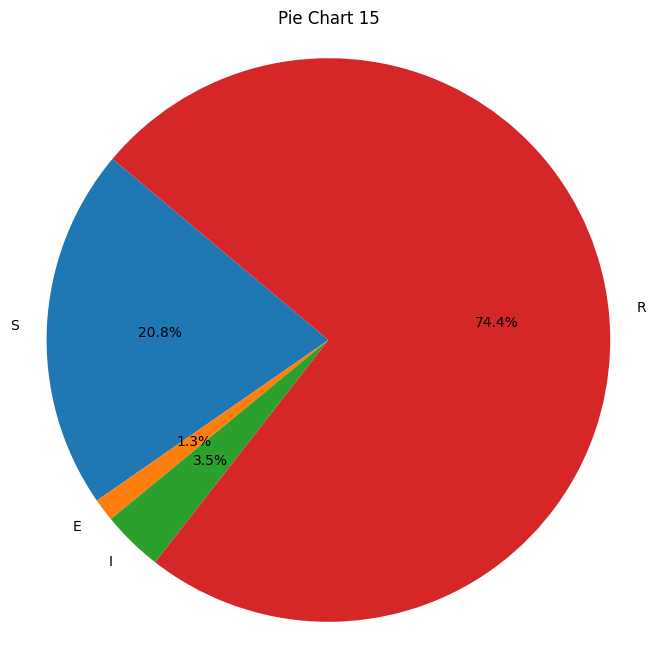

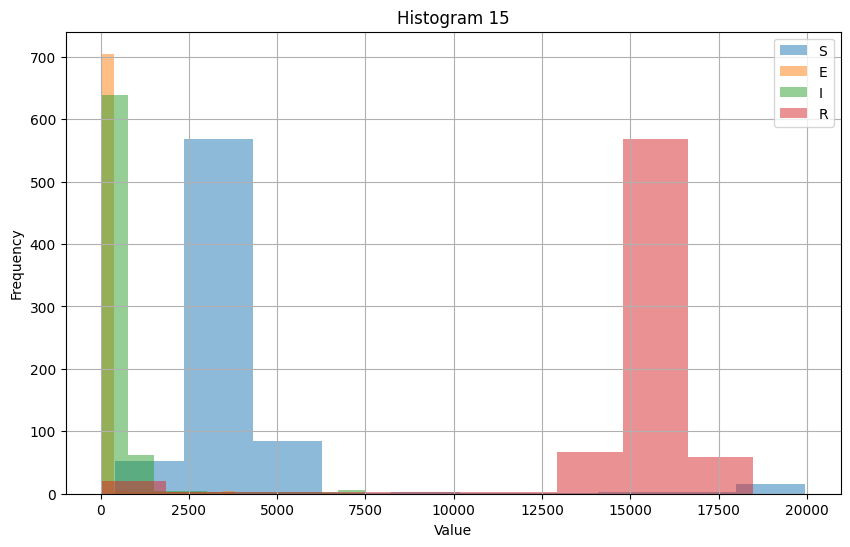

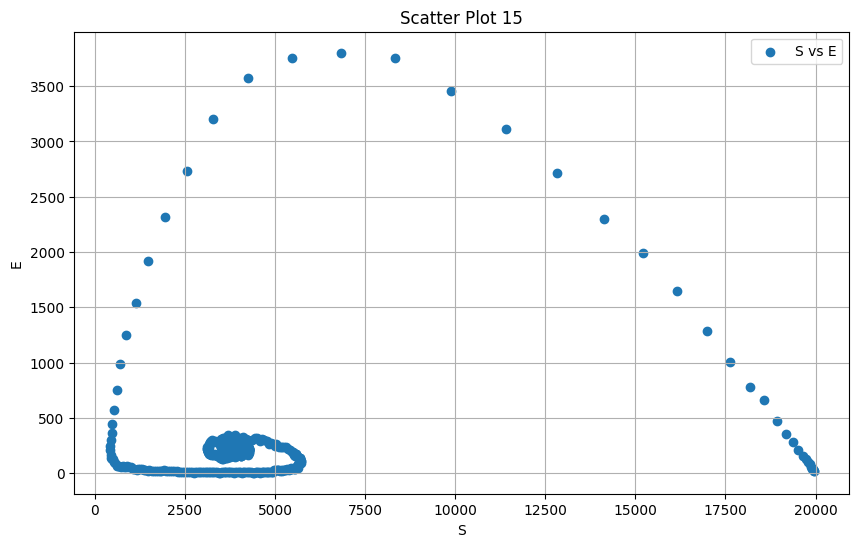

In [2]:
from AllPlot import pie_chart, histogram, scatter_plot
data_set = int(input("Data set ? (between 0 and 99): "))
while (data_set<0 or data_set>99):
    data_set = int(input("Data set ? (between 0 and 99): "))

pie_chart(data_set)
histogram(data_set)
scatter_plot(data_set)
    
##################################################################
# press Shift + Enter, or Run the cell with the top bar button   #
# You can try 1, 7, 38, 42, 64, 65, 98, 99 data sets as examples #
##################################################################

## Conclusion: <a id="conclusion"></a>

Through our experiment, we have observed various epidemiological models, all indicating a decrease in the number of infected individuals over time. This aligns with the expected outcomes of such models. Interestingly, drawing parallels with concepts discussed in class, we could view this experiment as an extension of the "Game of Life" but in a more sophisticated form. This analogy allows us to conceptualize the spread of viruses within a population, offering insights into the dynamics of infectious diseases and their impact on communities.